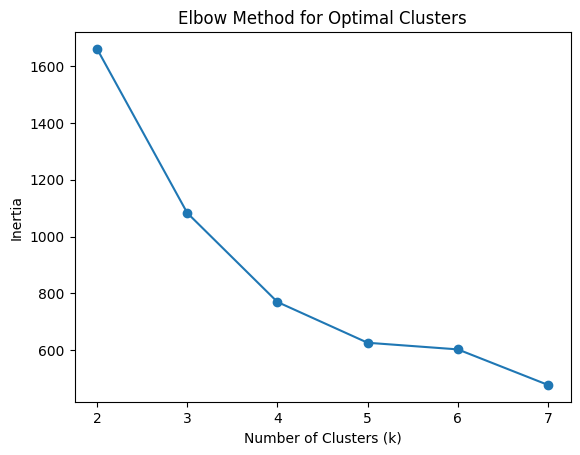


Cluster Summary (average values):
         goal_fx.GBP  raised_fx.GBP  equity_offered  pre_money_valuation  \
Cluster                                                                    
0          213785.68      280735.26           15.46           1578257.79   
1         1096153.85     2199616.31            7.14          20415533.00   
2         5500000.00     5680258.00           18.45          30869733.40   
3                NaN            NaN             NaN                  NaN   

         funders  percentage_raised  
Cluster                              
0         144.09             131.86  
1        1147.92             217.77  
2         147.50             103.00  
3            NaN                NaN  


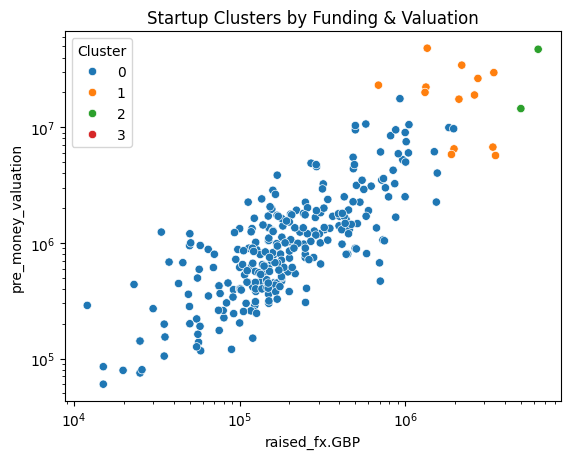

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("startup_funding.csv", encoding="latin1")

features = ["goal_fx.GBP", "raised_fx.GBP", "equity_offered", 
            "pre_money_valuation", "funders", "percentage_raised"]

X = df[features].copy()
X = X.fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 8), inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby("Cluster")[features].mean().round(2)
print("\nCluster Summary (average values):")
print(cluster_summary)

sns.scatterplot(data=df, x="raised_fx.GBP", y="pre_money_valuation",
                hue="Cluster", palette="tab10")
plt.xscale("log")
plt.yscale("log")
plt.title("Startup Clusters by Funding & Valuation")
plt.show()
